<a href="https://colab.research.google.com/github/Nyota-Lab/movies/blob/Features/Dise%C3%B1o_de_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import warnings
#warnings.simplefilter("ignore")

#Diseño de Features
* Primero cargamos las librerias a utilizar

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

* No todos los tipos de regresion tienen la misma facilidad para ser interpretados
* Procedemos a cargar nuestro dataframe

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = ('/content/drive/My Drive/Peliculas/x.csv')
X = pd.read_csv('/content/drive/My Drive/Peliculas/x.csv')

* Volvemos a generar los conjuntos de entrenamiento y de practica
* En este caso el drop lo realizamos con worldwide_gross y gross ya que pueden generar problemas de rendimiento en el modelo

In [0]:
#x = pd.read_csv(r'C:\Users\willi\Documents\Programacion\ML\x.csv')
y = X['worldwide_gross']
X = X.drop(['worldwide_gross','gross'], axis=1)
X

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5
...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3


* Instanciamos nuevamente nuestro modelo de regresion lineal

In [0]:
from sklearn.linear_model import Lasso
model = Lasso()

* Dividimos nuevamente nuestro dataset en los conjuntos de test y train
* Por defecto siempre la division se hace al 75%

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

* Volvemos a entrenar nuestro modelo de regresion lineal

In [0]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

* Evaluemos el desempeño de nuestro modelo a través de su R2

In [0]:
model.score(X_test,y_test)

0.5792824884281438

* Vamos a usar model.coef_ para identificar los parametros por los cuales se han multiplicado las features en la regresion lineal.
* Poner _ al final de una palabra clave es la convencion para identificar atributos dentro de sklearn

In [0]:
model.coef_

array([ 3.05214636e+00, -1.64229685e+05, -8.13164791e+06, -3.27249453e+04,
        2.43749046e+02, -1.01167064e-02,  2.79197417e+07])

* Como los valores están en diferentes dimensiones e incluso hay algunos negativos vamos a usar las posibilidades de numpy para poder visualizarlos de mejor manera
  * np.floor() nos dá sólo la parte entera de un número
  * np.log10() transforma el numero al logaritmo en base 10 para poder establecer una sola dimension para los valores
  * np.abs() nos entrega el valor absoluto

In [0]:
var = np.floor(np.log10(np.abs(model.coef_)))
var

array([ 0.,  5.,  6.,  4.,  2., -2.,  7.])

* Para poder tener una mejor comprension de estos parámetros los vamos a graficar

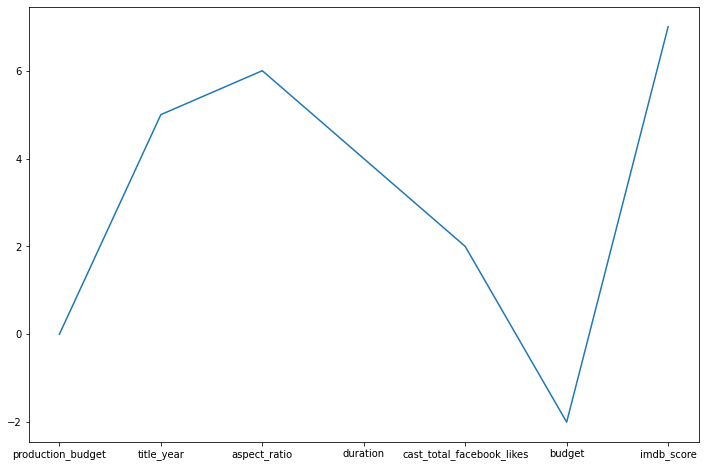

In [0]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

* Entonces podemos ver que hay features muy importantes y otras que no tanto por lo cual en nuestro dataframe hay que hacer algunas precisiones que no solo vienen de los parametros.
* Es importante no solo dejarse llevar por los graficos directamente pues es necesario notar que por ejemplo aspect_ratio parece ser una feature importante en la práctica no influye directamente en el nivel de ingresos obtenido
* Para este caso budget no parece ser una de las mas importantes


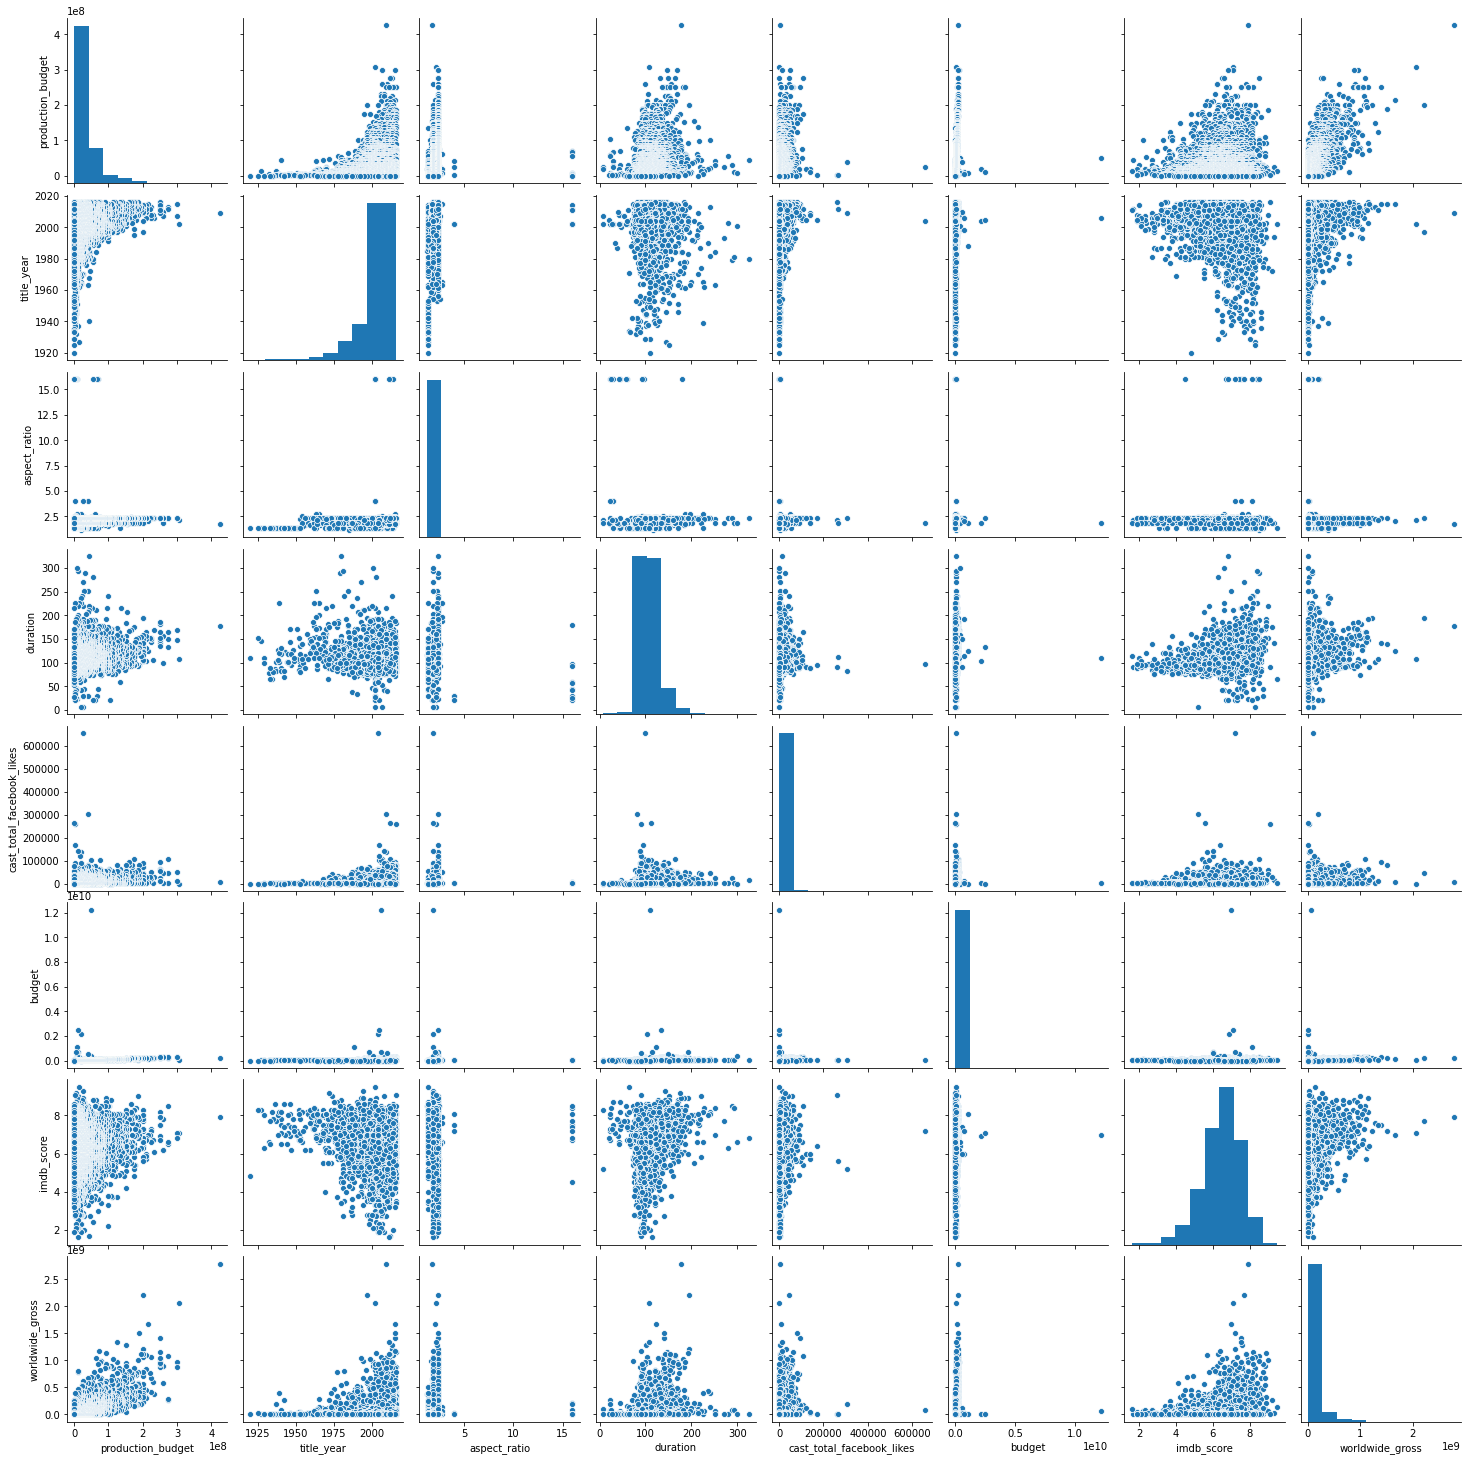

In [0]:
import seaborn as sns
z = pd.concat([X,y],axis=1)
sns.pairplot(z)

In [0]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
z2 = pd.concat([X,clase],axis=1)

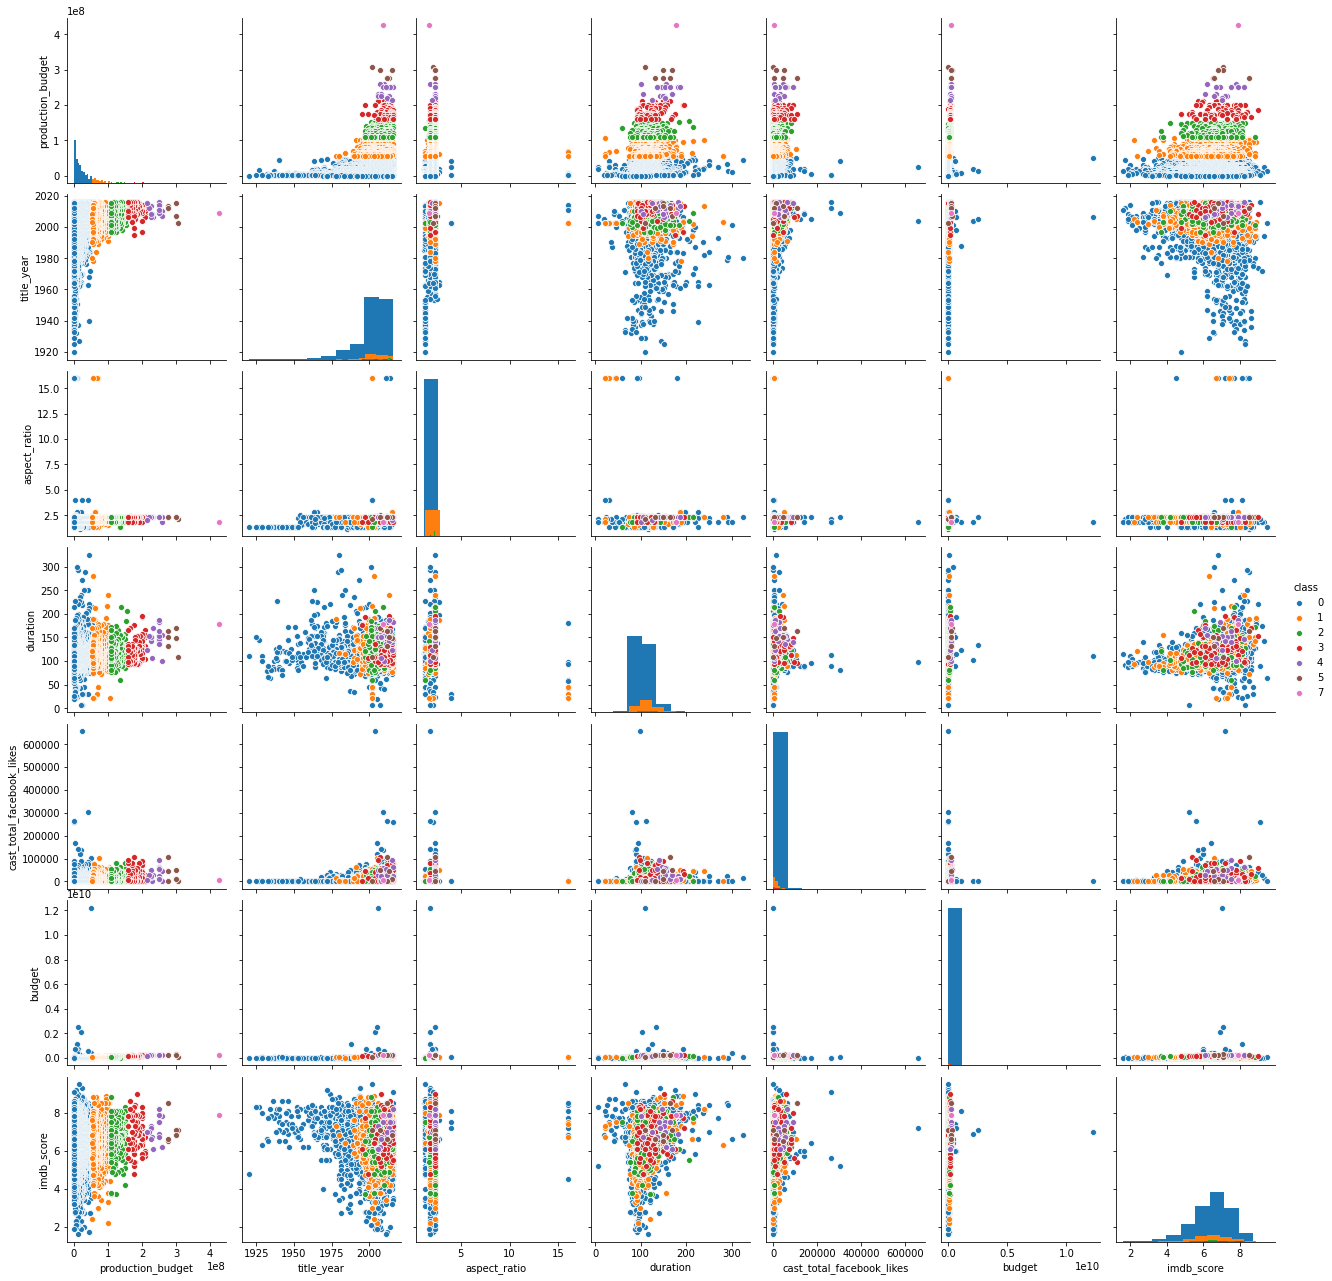

In [0]:
sns.pairplot(z2, hue = 'class',diag_kind='hist')

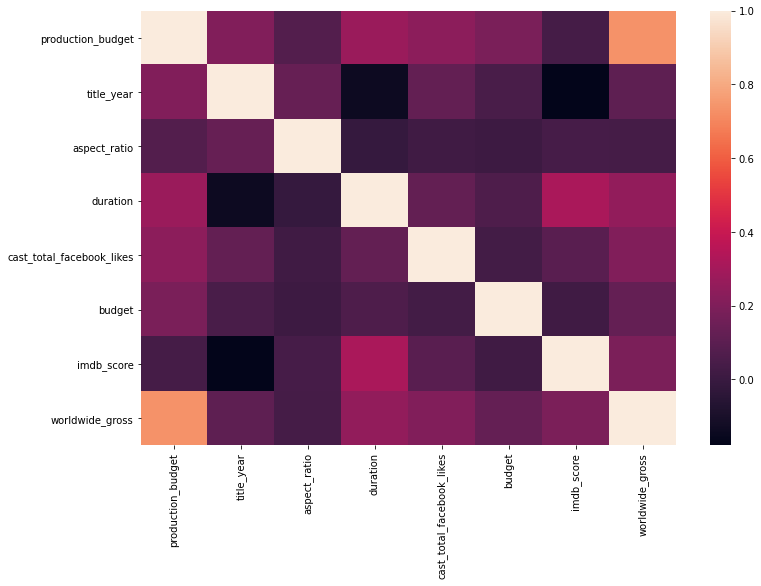

In [31]:
z3 = pd.concat([X,y],axis=1)
sns.heatmap(z3.corr())

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7fcdcaff3158>)

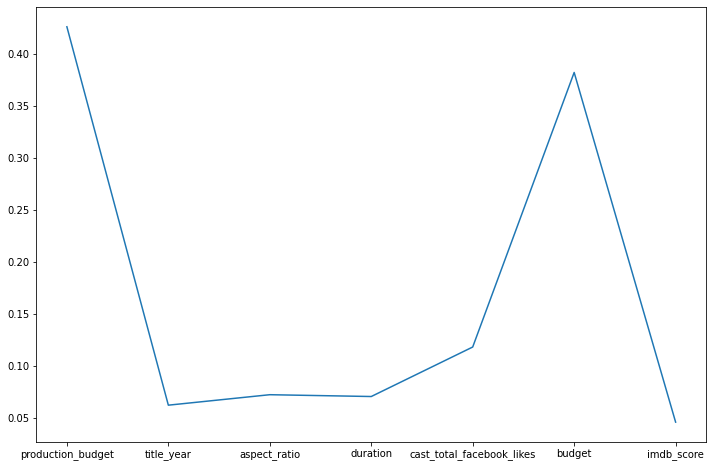

In [0]:
scores = selector.scores_
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));
